In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HCV data.csv to HCV data.csv


In [4]:
import pandas as pd

# Load the data directly into a DataFrame
df = pd.read_csv("HCV data.csv")

In [5]:
import os

# Dekho unzip hone ke baad kaunsi files mili hain
print(os.listdir("/content"))

['.config', 'california_cities.csv', 'HCV data.csv', 'sample_data']


In [6]:
import pandas as pd

# Ab file ko read karo using correct path
df = pd.read_csv("/content/HCV data.csv")

# Preview
df.head()


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [7]:
import pandas as pd

# Load the data from the correct file
df = pd.read_csv("/content/HCV data.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Map the 'Category' column
df['Category'] = df['Category'].map({
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 2,
    '3=Cirrhosis': 3
})

In [8]:
# df = pd.read_csv("HCV data.csv")
# df.columns = df.columns.str.strip().str.replace(' ', '_')


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df[['ALT', 'AST', 'BIL', 'ALP', 'CHOL', 'PROT', 'ALB', 'Age']]
y = df['Category']
y = y.apply(lambda val: 0 if val == 0 else 1)

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
# model = RandomForestClassifier(class_weight="balanced")
model.fit(X_train, y_train)


RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        99
           1       1.00      0.79      0.88        24

    accuracy                           0.96       123
   macro avg       0.98      0.90      0.93       123
weighted avg       0.96      0.96      0.96       123



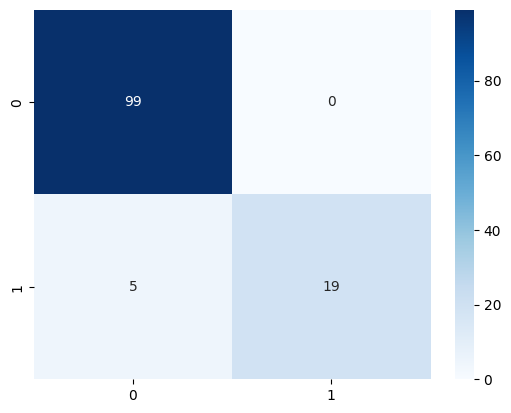

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns # Import seaborn
import matplotlib.pyplot as plt # Import matplotlib.pyplot

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.show()

In [12]:
len(df)


615

In [13]:
print("Total patients in the dataset:", len(df))


Total patients in the dataset: 615


In [14]:
df['Category'].value_counts()


,count
Category,
0,540
3,30
1,24
2,21


In [15]:
y.value_counts()


,count
Category,
0,540
1,75



🔹 Classification Report:

              precision    recall  f1-score   support

     Healthy       0.96      1.00      0.98       108
 HCV Patient       1.00      0.67      0.80        15

    accuracy                           0.96       123
   macro avg       0.98      0.83      0.89       123
weighted avg       0.96      0.96      0.96       123



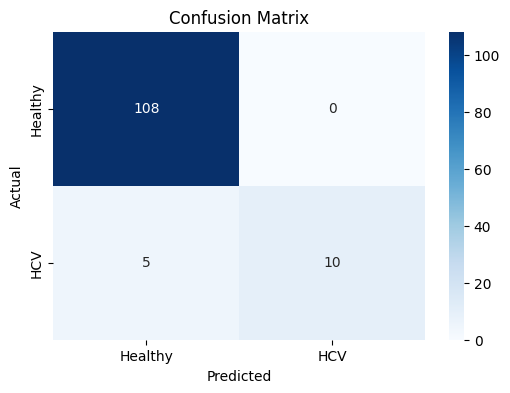

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and clean the dataset
df = pd.read_csv("/content/HCV data.csv")
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Encode categories
df['Category'] = df['Category'].map({
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 1,
    '3=Cirrhosis': 1
})

# Step 2: Features and Target
X = df[['ALT', 'AST', 'BIL', 'ALP', 'CHOL', 'PROT', 'ALB', 'Age']]
y = df['Category']

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Model training with class_weight
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Step 5: Prediction
y_pred = model.predict(X_test)

# Step 6: Evaluation
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'HCV Patient']))

# Step 7: Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['Healthy', 'HCV'], yticklabels=['Healthy', 'HCV'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



🔹 Classification Report:

              precision    recall  f1-score   support

     Healthy       0.98      0.98      0.98       108
 HCV Patient       0.87      0.87      0.87        15

    accuracy                           0.97       123
   macro avg       0.92      0.92      0.92       123
weighted avg       0.97      0.97      0.97       123



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


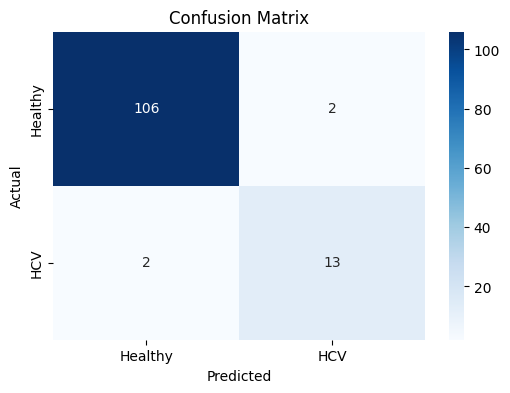

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load and preprocess
df = pd.read_csv("/content/HCV data.csv")
df.columns = df.columns.str.strip().str.replace(' ', '_')
df['Category'] = df['Category'].map({
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 1,
    '3=Cirrhosis': 1
})

# Features & target
X = df[['ALT', 'AST', 'BIL', 'ALP', 'CHOL', 'PROT', 'ALB', 'Age']]
y = df['Category']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Impute missing values in the training data
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer
X_train_imputed = imputer.fit_transform(X_train) # Fit and transform the training data

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train) # Use imputed data for SMOTE

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("\n🔹 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'HCV Patient']))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['Healthy', 'HCV'], yticklabels=['Healthy', 'HCV'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---- Without SMOTE ----
              precision    recall  f1-score   support

     Healthy       0.97      0.98      0.98       108
 HCV Patient       0.86      0.80      0.83        15

    accuracy                           0.96       123
   macro avg       0.91      0.89      0.90       123
weighted avg       0.96      0.96      0.96       123

---- With SMOTE ----
              precision    recall  f1-score   support

     Healthy       0.97      0.98      0.98       108
 HCV Patient       0.86      0.80      0.83        15

    accuracy                           0.96       123
   macro avg       0.91      0.89      0.90       123
weighted avg       0.96      0.96      0.96       123



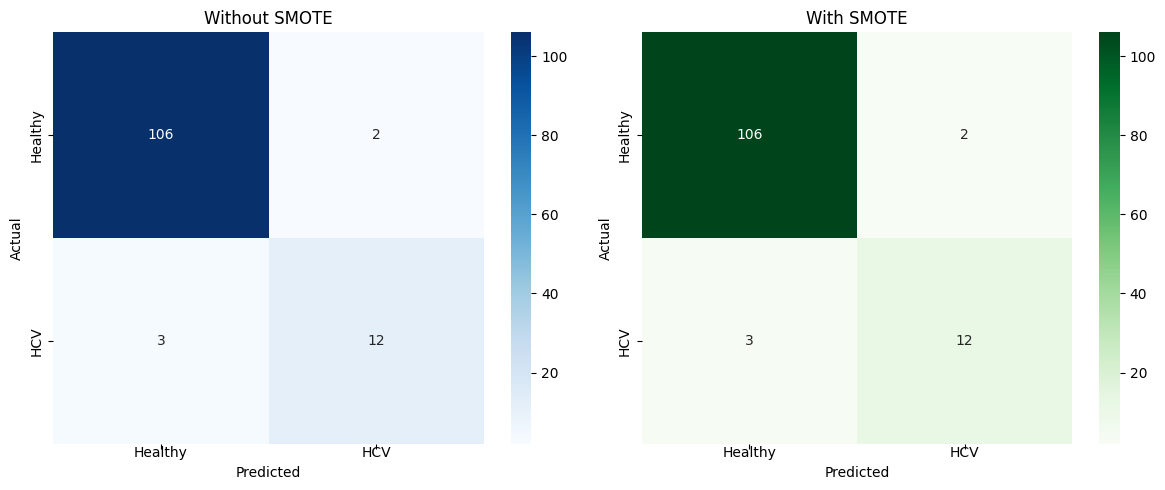

/tmp/ipython-input-2946376997.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")


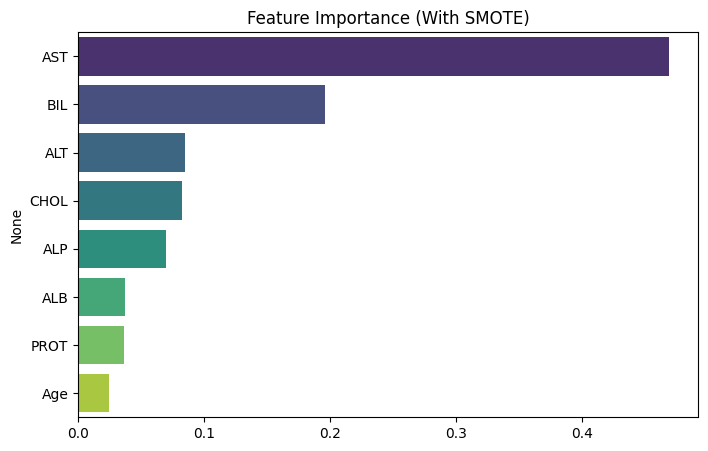

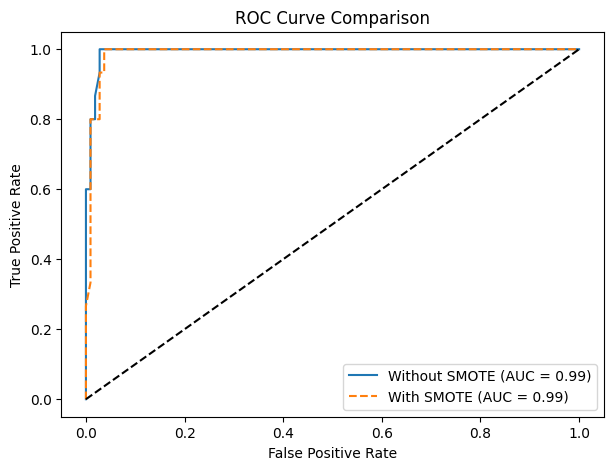

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load and preprocess
df = pd.read_csv("/content/HCV data.csv")
df.columns = df.columns.str.strip().str.replace(' ', '_')
df['Category'] = df['Category'].map({
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 1,
    '3=Cirrhosis': 1
})

# Features & target
X = df[['ALT', 'AST', 'BIL', 'ALP', 'CHOL', 'PROT', 'ALB', 'Age']]
y = df['Category']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Impute missing values
imputer = SimpleImputer(strategy='mean') # Initialize SimpleImputer

# Fit on training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# --- MODEL WITHOUT SMOTE ---
# Train the model without SMOTE on the imputed training data
model_no_smote = RandomForestClassifier(random_state=42)
model_no_smote.fit(X_train_imputed, y_train)
y_pred_no_smote = model_no_smote.predict(X_test_imputed) # Predict on imputed test data
print("---- Without SMOTE ----")
print(classification_report(y_test, y_pred_no_smote, target_names=['Healthy', 'HCV Patient']))

# --- MODEL WITH SMOTE ---
smote = SMOTE(random_state=42)
# Apply SMOTE on the imputed training data
X_train_res, y_train_res = smote.fit_resample(X_train_imputed, y_train)
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_res, y_train_res)
y_pred_smote = model_smote.predict(X_test_imputed) # Predict on imputed test data
print("---- With SMOTE ----")
print(classification_report(y_test, y_pred_smote, target_names=['Healthy', 'HCV Patient']))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_no_smote), annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Without SMOTE")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_xticklabels(['Healthy', 'HCV'], va='center')
axes[0].set_yticklabels(['Healthy', 'HCV'], va='center')


sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap="Greens", ax=axes[1])
axes[1].set_title("With SMOTE")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_xticklabels(['Healthy', 'HCV'], va='center')
axes[1].set_yticklabels(['Healthy', 'HCV'], va='center')
plt.tight_layout()
plt.show()


# Feature Importance
importances = model_smote.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=X.columns[indices], palette="viridis")
plt.title("Feature Importance (With SMOTE)")
plt.show()

# ROC Curves
# Predict probabilities on imputed test data
y_prob_no_smote = model_no_smote.predict_proba(X_test_imputed)[:, 1]
y_prob_smote = model_smote.predict_proba(X_test_imputed)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, y_prob_no_smote)
fpr2, tpr2, _ = roc_curve(y_test, y_prob_smote)

plt.figure(figsize=(7, 5))
plt.plot(fpr1, tpr1, label=f"Without SMOTE (AUC = {auc(fpr1, tpr1):.2f})")
plt.plot(fpr2, tpr2, label=f"With SMOTE (AUC = {auc(fpr2, tpr2):.2f})", linestyle="--")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()